In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

!pip install plotly
import plotly.express as px

!pip install dataprep
from dataprep.eda import create_report

!pip install h2o
import h2o
from h2o.automl import H2OAutoML

NumExpr defaulting to 2 threads.


In [2]:
#read data
cancer_df = pd.read_csv('cervical_cancer.csv')

In [3]:
#preview
cancer_df.head(10)

Age Number of sexual partners  ... Citology Biopsy
0   18                       4.0  ...        0      0
1   15                       1.0  ...        0      0
2   34                       1.0  ...        0      0
3   52                       5.0  ...        0      0
4   46                       3.0  ...        0      0
5   42                       3.0  ...        0      0
6   51                       3.0  ...        0      1
7   26                       1.0  ...        0      0
8   45                       1.0  ...        0      0
9   44                       3.0  ...        0      0

[10 rows x 36 columns]

# Exploratory Data Analysis

In [4]:
#info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
#statistics
cancer_df.describe()

Age  STDs: Number of diagnosis  ...    Citology      Biopsy
count  858.000000                 858.000000  ...  858.000000  858.000000
mean    26.820513                   0.087413  ...    0.051282    0.064103
std      8.497948                   0.302545  ...    0.220701    0.245078
min     13.000000                   0.000000  ...    0.000000    0.000000
25%     20.000000                   0.000000  ...    0.000000    0.000000
50%     25.000000                   0.000000  ...    0.000000    0.000000
75%     32.000000                   0.000000  ...    0.000000    0.000000
max     84.000000                   3.000000  ...    1.000000    1.000000

[8 rows x 10 columns]

In [6]:
#replace '?' with NaN 
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

Age Number of sexual partners  ... Citology Biopsy
0     18                       4.0  ...        0      0
1     15                       1.0  ...        0      0
2     34                       1.0  ...        0      0
3     52                       5.0  ...        0      0
4     46                       3.0  ...        0      0
..   ...                       ...  ...      ...    ...
853   34                       3.0  ...        0      0
854   32                       2.0  ...        0      0
855   25                       2.0  ...        1      0
856   33                       2.0  ...        0      0
857   29                       2.0  ...        0      0

[858 rows x 36 columns]

In [7]:
#look at null
cancer_df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

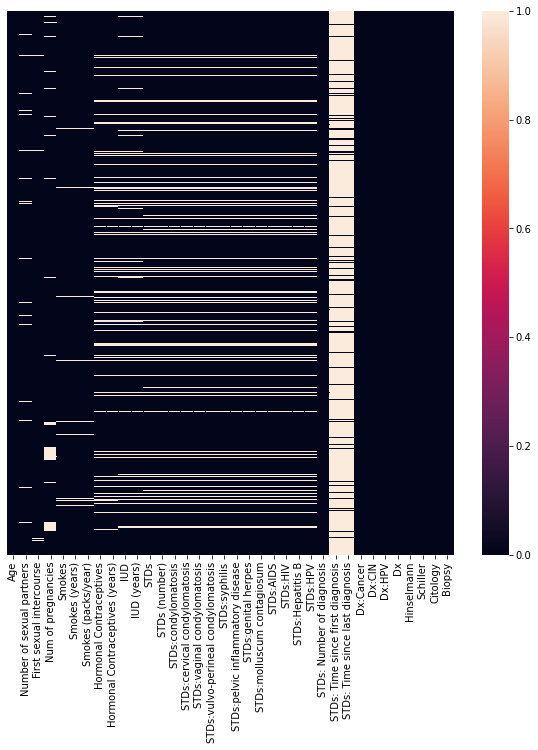

In [8]:
#plot heatmap for all locations that have null values
plt.figure(figsize = (10, 10))
sns.heatmap(cancer_df.isnull(), yticklabels=False)

In [9]:
#since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values 
#we can drop them
cancer_df = cancer_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
cancer_df

Age Number of sexual partners  ... Citology Biopsy
0     18                       4.0  ...        0      0
1     15                       1.0  ...        0      0
2     34                       1.0  ...        0      0
3     52                       5.0  ...        0      0
4     46                       3.0  ...        0      0
..   ...                       ...  ...      ...    ...
853   34                       3.0  ...        0      0
854   32                       2.0  ...        0      0
855   25                       2.0  ...        1      0
856   33                       2.0  ...        0      0
857   29                       2.0  ...        0      0

[858 rows x 34 columns]

In [10]:
#since most of the column types are object, we are not able to get the statistics of the dataframe.
#convert them to numeric type
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [11]:
#statistics of the dataframe
cancer_df.describe()

Age  Number of sexual partners  ...    Citology      Biopsy
count  858.000000                 832.000000  ...  858.000000  858.000000
mean    26.820513                   2.527644  ...    0.051282    0.064103
std      8.497948                   1.667760  ...    0.220701    0.245078
min     13.000000                   1.000000  ...    0.000000    0.000000
25%     20.000000                   2.000000  ...    0.000000    0.000000
50%     25.000000                   2.000000  ...    0.000000    0.000000
75%     32.000000                   3.000000  ...    0.000000    0.000000
max     84.000000                  28.000000  ...    1.000000    1.000000

[8 rows x 34 columns]

In [12]:
#get average
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [13]:
#replace null values with mean
cancer_df = cancer_df.fillna(cancer_df.mean())
cancer_df

Age  Number of sexual partners  ...  Citology  Biopsy
0     18                        4.0  ...         0       0
1     15                        1.0  ...         0       0
2     34                        1.0  ...         0       0
3     52                        5.0  ...         0       0
4     46                        3.0  ...         0       0
..   ...                        ...  ...       ...     ...
853   34                        3.0  ...         0       0
854   32                        2.0  ...         0       0
855   25                        2.0  ...         1       0
856   33                        2.0  ...         0       0
857   29                        2.0  ...         0       0

[858 rows x 34 columns]

# Data Visualization

In [14]:
#correlation matrix
corr = cancer_df.corr()
corr

Age  ...    Biopsy
Age                                 1.000000  ...  0.055956
Number of sexual partners           0.084896  ... -0.001429
First sexual intercourse            0.369168  ...  0.007262
Num of pregnancies                  0.526137  ...  0.043460
Smokes                              0.055813  ...  0.029091
Smokes (years)                      0.217349  ...  0.061484
Smokes (packs/year)                 0.131180  ...  0.024657
Hormonal Contraceptives             0.065624  ...  0.007711
Hormonal Contraceptives (years)     0.277181  ...  0.078995
IUD                                 0.267662  ...  0.051554
IUD (years)                         0.205886  ...  0.032250
STDs                                0.010017  ...  0.106737
STDs (number)                      -0.015488  ...  0.096218
STDs:condylomatosis                -0.025012  ...  0.084520
STDs:cervical condylomatosis             NaN  ...       NaN
STDs:vaginal condylomatosis         0.006220  ... -0.019673
STDs:vulvo-perineal condylomatosis -0.022614  ...  0.086977
STDs:syphilis                       0.010442  ... -0.042128
STDs:pelvic inflammatory disease    0.023216  ... -0.009817
STDs:genital herpes                -0.029076  ...  0.129657
STDs:molluscum contagiosum         -0.000919  ... -0.009817
STDs:AIDS                                NaN  ...       NaN
STDs:HIV                           -0.002025  ...  0.124133
STDs:Hepatitis B                   -0.029076  ... -0.009817
STDs:HPV                            0.038546  ... -0.013892
STDs: Number of diagnosis          -0.001606  ...  0.097449
Dx:Cancer                           0.110340  ...  0.160905
Dx:CIN                              0.061443  ...  0.113172
Dx:HPV                              0.101722  ...  0.160905
Dx                                  0.092635  ...  0.157607
Hinselmann                         -0.003967  ...  0.547417
Schiller                            0.103283  ...  0.733204
Citology                           -0.016862  ...  0.327466
Biopsy                              0.055956  ...  1.000000

[34 rows x 34 columns]

In [15]:
#create report
report = create_report(cancer_df, title='My Report')
report

# Train H2O AutoML

In [35]:
#initiate
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         10 mins 05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.3
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_l9lkhb
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.164 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

In [37]:
#convert pandas df into h2o frame
h2o_df = h2o.H2OFrame(cancer_df)

#preview
h2o_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy 
 
 
 18 4 15 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 15 1 14 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 34 1 16.9953 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 52 5 16 4 1 37 37 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 
 46 3 21 4 0 0 0 1 15 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 42 3 23 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 51 3 17 6 1 34 3.4 0 0 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 
 26 1 26 3 0 0 0 1 2 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 45 1 20 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 
 44 3 15 2.27556 1 1.26697 2.8 0 0 0.112011 0.514804 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [39]:
#statistics
h2o_df.describe()

Rows:858
Cols:34




Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy 
 
 
 type int real real real real real real real real real real real real real int real real real real real real int real real real int int int int int int int int int 
 mins 13.0 1.0 10.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 mean 26.82051282051281 2.527644230769229 16.99529964747356 2.2755610972568596 0.1455621301775149 1.2197214125857974 0.45314395064923096 0.6413333333333339 2.2564192013893347 0.11201079622132265 0.5148043184885296 0.10491367861885777 0.17662682602921645 0.05843293492695881 0.0 0.005312084993359892 0.057104913678618904 0.023904382470119518 0.0013280212483399733 0.0013280212483399723 0.0013280212483399733 0.0 0.02390438247011952 0.0013280212483399727 0.0026560424966799467 0.08741258741258745 0.02097902097902098 0.01048951048951049 0.02097902097902098 0.027972027972027972 0.04079254079254079 0.08624708624708624 0.05128205128205128 0.0641025641025641 
 maxs 84.0 28.0 32.0 11.0 1.0 37.0 37.0 1.0 30.0 1.0 19.0 1.0 4.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
 sigma 8.497948065482602 1.6422670468948033 2.7918829667636307 1.399325140522659 0.3501889104921777 4.057884876966794 2.2096573290995956 0.4486706238053575 3.5190818172926286 0.29325976218008654 1.8055854274592453 0.28724706166127123 0.5264404943519086 0.21986776248292073 0.0 0.06813699958037694 0.2175081342429894 0.14318318641611819 0.034136659577812506 0.03413665957781252 0.03413665957781251 0.0 0.14318318641611827 0.03413665957781252 0.04824441751620589 0.3025447418507477 0.1433975861165658 0.1019391586774784 0.1433975861165658 0.1649888484215437 0.1979246496661347 0.2808923013686258 0.22070109393249174 0.24507841474716066 
 zeros 0 0 0 16 722 722 722 269 269 658 658 674 674 709 858 749 710 735 752 752 752 858 735 752 751 787 840 849 840 834 823 784 814 803 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 18.0 4.0 15.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 1 15.0 1.0 14.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 2 34.0 1.0 16.995299647473562 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 3 52.0 5.0 16.0 4.0 1.0 37.0 37.0 1.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
 4 46.0 3.0 21.0 4.0 0.0 0.0 0.0 1.0 15.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 5 42.0 3.0 23.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 6 51.0 3.0 17.0 6.0 1.0 34.0 3.4 0.0 0.0 1.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 
 7 26.0 1.0 26.0 3.0 0.0 0.0 0.0 1.0 2.0 1.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 8 45.0 1.0 20.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 
 9 44.0 3.0 15.0 2.275561097256858 1.0 1.266972909 2.8 0.0 0.0 0.11201079622132254 0.514804318488529 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [41]:
#split train and test sets
train, test = h2o_df.split_frame(ratios=[0.75], seed=121)

In [43]:
#define X and y
X = train.columns
y = 'Biopsy'
X.remove(y)

In [45]:
#for binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [47]:
X

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology']

In [48]:
y

'Biopsy'

In [49]:
#initiate
aml = H2OAutoML(balance_classes=True,
                stopping_metric='AUC',     #for classification
                seed=121,
                max_models=20,
                exclude_algos = ["StackedEnsemble"])

#train
aml.train(x=X, 
          y=y, 
          training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_2_20211010_75532


Model Summary: 


number_of_trees
0               32.0



ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.021530951938370638
RMSE: 0.14673429026090198
LogLoss: 0.07715843522928012
Mean Per-Class Error: 0.03843639440086144
AUC: 0.9860406091370558
AUCPR: 0.8753799388484983
Gini: 0.9720812182741116

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46655237674713135: 


0     1   Error           Rate
0      0  581.0  10.0  0.0169   (10.0/591.0)
1      1    7.0  37.0  0.1591     (7.0/44.0)
2  Total  588.0  47.0  0.0268   (17.0/635.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.466552    0.813187   45.0
1                        max f2   0.073098    0.860656   66.0
2                  max f0point5   0.631629    0.872093   30.0
3                  max accuracy   0.631629    0.974803   30.0
4                 max precision   0.921033    1.000000    0.0
5                    max recall   0.012546    1.000000  171.0
6               max specificity   0.921033    1.000000    0.0
7              max absolute_mcc   0.466552    0.799289   45.0
8    max min_per_class_accuracy   0.073098    0.954545   66.0
9   max mean_per_class_accuracy   0.059608    0.961564   72.0
10                      max tns   0.921033  591.000000    0.0
11                      max fns   0.921033   43.000000    0.0
12                      max fps   0.001213  591.000000  399.0
13                      max tps   0.012546   44.000000  171.0
14                      max tnr   0.921033    1.000000    0.0
15                      max fnr   0.921033    0.977273    0.0
16                      max fpr   0.001213    1.000000  399.0
17                      max tpr   0.012546    1.000000  171.0


Gains/Lift Table: Avg response rate:  6.93 %, avg score:  6.86 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011024  ...      1343.181818            0.159091
1       2                  0.020472  ...      1232.167832            0.271035
2       3                  0.031496  ...      1271.022727            0.430126
3       4                  0.040945  ...      1287.674825            0.566490
4       5                  0.050394  ...      1252.982955            0.678434
5       6                  0.100787  ...       824.538352            0.892901
6       7                  0.151181  ...       546.425189            0.887594
7       8                  0.200000  ...       388.636364            0.835141
8       9                  0.300787  ...       224.904807            0.726850
9      10                  0.401575  ...       149.019608            0.642978
10     11                  0.500787  ...        99.685535            0.536379
11     12                  0.603150  ...        65.796345            0.426396
12     13                  0.699213  ...        43.018018            0.323181
13     14                  0.806299  ...        24.023438            0.208122
14     15                  0.900787  ...        11.013986            0.106599
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.03733712807617235
RMSE: 0.1932281761963621
LogLoss: 0.12760174945797606
Mean Per-Class Error: 0.08679433933241043
AUC: 0.9427588063374864
AUCPR: 0.533007175280796
Gini: 0.8855176126749729

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27486762404441833: 


0     1   Error           Rate
0      0  569.0  22.0  0.0372   (22.0/591.0)
1      1    6.0  38.0  0.1364     (6.0/44.0)
2  Total  575.0  60.0  0.0441   (28.0/635.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.274868    0.730769   58.0
1                        max f2   0.274868    0.805085   58.0
2                  max f0point5   0.274868    0.669014   58.0
3                  max accuracy   0.274868    0.955906   58.0
4                 max precision   0.700748    0.681818   21.0
5                    max recall   0.004416    1.000000  331.0
6               max specificity   0.962763    0.998308    0.0
7              max absolute_mcc   0.274868    0.717475   58.0
8    max min_per_class_accuracy   0.029493    0.893401   97.0
9   max mean_per_class_accuracy   0.274868    0.913206   58.0
10                      max tns   0.962763  590.000000    0.0
11                      max fns   0.962763   44.000000    0.0
12                      max fps   0.001320  591.000000  399.0
13                      max tps   0.004416   44.000000  331.0
14                      max tnr   0.962763    0.998308    0.0
15                      max fnr   0.962763    1.000000    0.0
16                      max fpr   0.001320    1.000000  399.0
17                      max tpr   0.004416    1.000000  331.0


Gains/Lift Table: Avg response rate:  6.93 %, avg score:  6.93 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011024  ...       518.506494            0.061414
1       2                  0.020472  ...       677.097902            0.148939
2       3                  0.031496  ...       838.068182            0.283610
3       4                  0.040945  ...       843.618881            0.371135
4       5                  0.050394  ...       756.889205            0.409822
5       6                  0.100787  ...       756.889205            0.819643
6       7                  0.151181  ...       486.292614            0.789917
7       8                  0.200000  ...       354.545455            0.761883
8       9                  0.300787  ...       209.792956            0.678011
9      10                  0.400000  ...       144.318182            0.620251
10     11                  0.500787  ...        95.147227            0.511960
11     12                  0.600000  ...        62.878788            0.405361
12     13                  0.699213  ...        39.767609            0.298762
13     14                  0.800000  ...        25.000000            0.214890
14     15                  0.899213  ...        11.208406            0.108291
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...  cv_4_valid  cv_5_valid
0                  accuracy  0.960630  ...    0.968504    0.968504
1                       auc  0.953316  ...    0.936956    0.982793
2                       err  0.039370  ...    0.031496    0.031496
3                 err_count  5.000000  ...    4.000000    4.000000
4                  f0point5  0.664852  ...    0.833333    0.802469
5                        f1  0.713333  ...    0.833333    0.866667
6                        f2  0.777319  ...    0.833333    0.942029
7            lift_top_group  9.141209  ...   10.583333    4.884615
8                   logloss  0.127602  ...    0.135592    0.105809
9       max_per_class_error  0.183684  ...    0.166667    0.035088
10                      mcc  0.705408  ...    0.815942    0.858996
11  mean_per_class_accuracy  0.900634  ...    0.907971    0.982456
12     mean_per_class_error  0.099366  ...    0.092029    0.017544
13                      mse  0.037337  ...    0.036741    0.033113
14                   pr_auc  0.551714  ...    0.816023    0.732019
15                precision  0.638411  ...    0.833333    0.764706
16                       r2  0.346212  ...    0.570585    0.639618
17                   recall  0.833333  ...    0.833333    1.000000
18                     rmse  0.192977  ...    0.191679    0.181971
19              specificity  0.967934  ...    0.982609    0.964912

[20 rows x 8 columns]


Scoring History: 


timestamp  ... training_lift  training_classification_error
0    2021-10-10 07:55:58  ...      1.000000                       0.930709
1    2021-10-10 07:55:58  ...     10.823864                       0.033071
2    2021-10-10 07:55:58  ...     12.370130                       0.033071
3    2021-10-10 07:55:58  ...     12.370130                       0.031496
4    2021-10-10 07:55:58  ...     14.431818                       0.028346
5    2021-10-10 07:55:58  ...     14.431818                       0.023622
6    2021-10-10 07:55:59  ...     14.431818                       0.025197
7    2021-10-10 07:55:59  ...     14.431818                       0.026772

[8 rows x 10 columns]


Variable Importances: 


variable  ...  percentage
0                          Schiller  ...    0.545848
1                        Hinselmann  ...    0.136560
2                               Age  ...    0.106243
3                          Citology  ...    0.057707
4   Hormonal Contraceptives (years)  ...    0.051172
5                Num of pregnancies  ...    0.038026
6         Number of sexual partners  ...    0.029730
7           Hormonal Contraceptives  ...    0.016080
8          First sexual intercourse  ...    0.008720
9                              STDs  ...    0.003509
10                    STDs (number)  ...    0.002559
11                      IUD (years)  ...    0.002104
12                           Smokes  ...    0.001741

[13 rows x 4 columns]

# Leaderboard Exploration

In [50]:
#leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 XGBoost_3_AutoML_2_20211010_75532 0.942759 0.127602 0.533007 0.0867943 0.193228 0.0373371 
 GBM_grid_1_AutoML_2_20211010_75532_model_2 0.940144 0.154534 0.585936 0.099004 0.217483 0.0472989 
 GBM_grid_1_AutoML_2_20211010_75532_model_1 0.939567 0.15683 0.646503 0.126327 0.218648 0.0478072 
 GBM_1_AutoML_2_20211010_75532 0.937471 0.131464 0.547071 0.0867943 0.19895 0.0395812 
 DRF_1_AutoML_2_20211010_75532 0.932145 0.280776 0.632931 0.134787 0.231469 0.0535778 
 GBM_4_AutoML_2_20211010_75532 0.928703 0.157711 0.574019 0.10783 0.216296 0.0467841 
 GBM_2_AutoML_2_20211010_75532 0.927396 0.150091 0.573392 0.0884864 0.20784 0.0431974 
 XGBoost_2_AutoML_2_20211010_75532 0.925761 0.1217 0.52211 0.0867943 0.186521 0.0347902 
 GBM_3_AutoML_2_20211010_75532 0.925146 0.153831 0.585532 0.108676 0.211314 0.0446537 
 DeepLearning_grid_2_AutoML_2_20211010_75532_model_1 0.922166 0.2905 0.486655 0.111694 0.233324 0.05444 
 XRT_1_AutoML_2_20211010_75532 0.921012 0.20874 0.499643 0.203815 0.241764 0.0584498 
 DeepLearning_grid_1_AutoML_2_20211010_75532_model_1 0.915398 0.304562 0.579205 0.174319 0.219554 0.0482037 
 DeepLearning_grid_3_AutoML_2_20211010_75532_model_1 0.902611 0.284176 0.483481 0.156668 0.22112 0.0488943 
 GBM_5_AutoML_2_20211010_75532 0.89144 0.180122 0.583776 0.139382 0.217975 0.0475132 
 DeepLearning_1_AutoML_2_20211010_75532 0.890228 0.30999 0.411607 0.173108 0.229962 0.0528827 
 XGBoost_grid_1_AutoML_2_20211010_75532_model_3 0.887671 0.124613 0.522681 0.0867943 0.185613 0.0344522 
 GLM_1_AutoML_2_20211010_75532 0.591198 0.254778 0.206138 0.369193 0.254196 0.0646157 
 XGBoost_grid_1_AutoML_2_20211010_75532_model_2 0.571431 0.251724 0.0776247 0.406726 0.254388 0.0647133 
 XGBoost_grid_1_AutoML_2_20211010_75532_model_1 0.567393 0.252739 0.0731689 0.395016 0.254558 0.0647998 
 XGBoost_1_AutoML_2_20211010_75532 0.564221 0.254435 0.0738519 0.412417 0.25557 0.065316

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id auc logloss aucpr mean_per_class_error rmse mse training_time_ms predict_time_per_row_ms algo 
 
 
 XGBoost_3_AutoML_2_20211010_75532 0.942759 0.127602 0.533007 0.0867943 0.193228 0.0373371 126 0.014278 XGBoost 
 GBM_grid_1_AutoML_2_20211010_75532_model_2 0.940144 0.154534 0.585936 0.099004 0.217483 0.0472989 177 0.024334 GBM 
 GBM_grid_1_AutoML_2_20211010_75532_model_1 0.939567 0.15683 0.646503 0.126327 0.218648 0.0478072 124 0.045944 GBM 
 GBM_1_AutoML_2_20211010_75532 0.937471 0.131464 0.547071 0.0867943 0.19895 0.0395812 405 0.012197 GBM 
 DRF_1_AutoML_2_20211010_75532 0.932145 0.280776 0.632931 0.134787 0.231469 0.0535778 331 0.02937 DRF 
 GBM_4_AutoML_2_20211010_75532 0.928703 0.157711 0.574019 0.10783 0.216296 0.0467841 369 0.019015 GBM 
 GBM_2_AutoML_2_20211010_75532 0.927396 0.150091 0.573392 0.0884864 0.20784 0.0431974 553 0.02575 GBM 
 XGBoost_2_AutoML_2_20211010_75532 0.925761 0.1217 0.52211 0.0867943 0.186521 0.0347902 1340 0.011441 XGBoost 
 GBM_3_AutoML_2_20211010_75532 0.925146 0.153831 0.585532 0.108676 0.211314 0.0446537 456 0.029488 GBM 
 DeepLearning_grid_2_AutoML_2_20211010_75532_model_1 0.922166 0.2905 0.486655 0.111694 0.233324 0.05444 25645 0.046667 DeepLearning 
 XRT_1_AutoML_2_20211010_75532 0.921012 0.20874 0.499643 0.203815 0.241764 0.0584498 536 0.020261 DRF 
 DeepLearning_grid_1_AutoML_2_20211010_75532_model_1 0.915398 0.304562 0.579205 0.174319 0.219554 0.0482037 20639 0.019943 DeepLearning 
 DeepLearning_grid_3_AutoML_2_20211010_75532_model_1 0.902611 0.284176 0.483481 0.156668 0.22112 0.0488943 39409 0.045606 DeepLearning 
 GBM_5_AutoML_2_20211010_75532 0.89144 0.180122 0.583776 0.139382 0.217975 0.0475132 245 0.01415 GBM 
 DeepLearning_1_AutoML_2_20211010_75532 0.890228 0.30999 0.411607 0.173108 0.229962 0.0528827 238 0.01312 DeepLearning 
 XGBoost_grid_1_AutoML_2_20211010_75532_model_3 0.887671 0.124613 0.522681 0.0867943 0.185613 0.0344522 116 0.008402 XGBoost 
 GLM_1_AutoML_2_20211010_75532 0.591198 0.254778 0.206138 0.369193 0.254196 0.0646157 72 0.011731 GLM 
 XGBoost_grid_1_AutoML_2_20211010_75532_model_2 0.571431 0.251724 0.0776247 0.406726 0.254388 0.0647133 164 0.011684 XGBoost 
 XGBoost_grid_1_AutoML_2_20211010_75532_model_1 0.567393 0.252739 0.0731689 0.395016 0.254558 0.0647998 123 0.007173 XGBoost 
 XGBoost_1_AutoML_2_20211010_75532 0.564221 0.254435 0.0738519 0.412417 0.25557 0.065316 193 0.007999 XGBoost

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_3_AutoML_2_20211010_75532


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27013739943504333: 


0     1   Error          Rate
0      0  209.0   3.0  0.0142   (3.0/212.0)
1      1    1.0  10.0  0.0909    (1.0/11.0)
2  Total  210.0  13.0  0.0179   (4.0/223.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

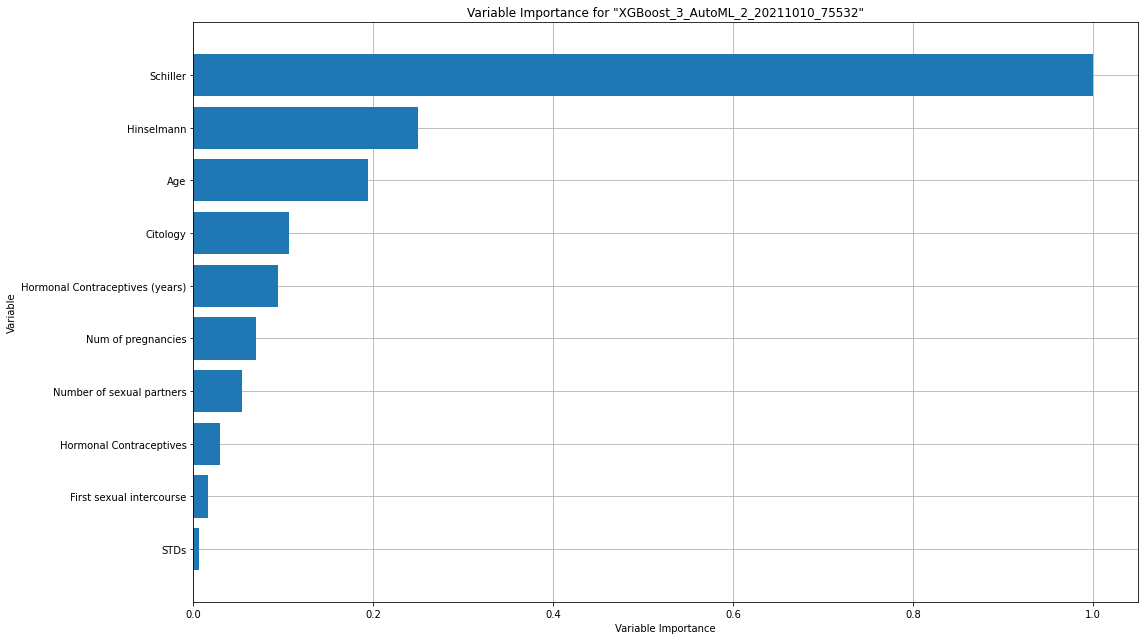

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

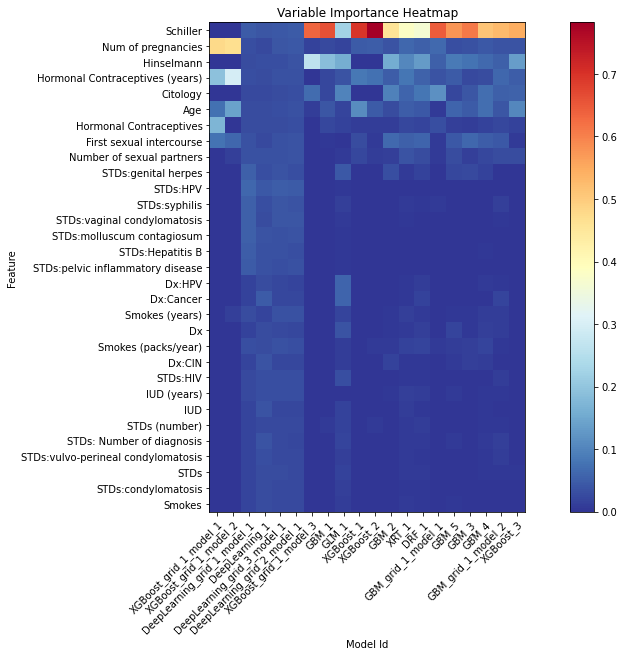

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

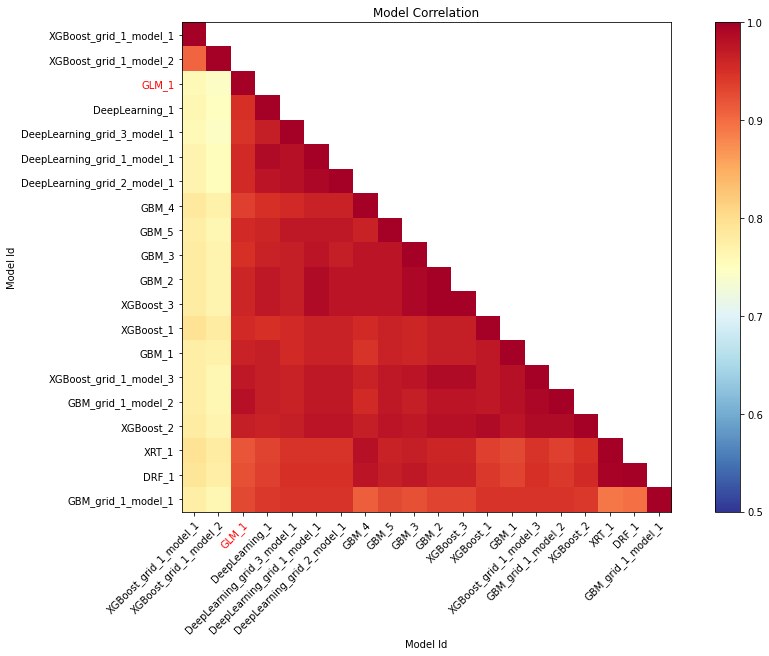

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

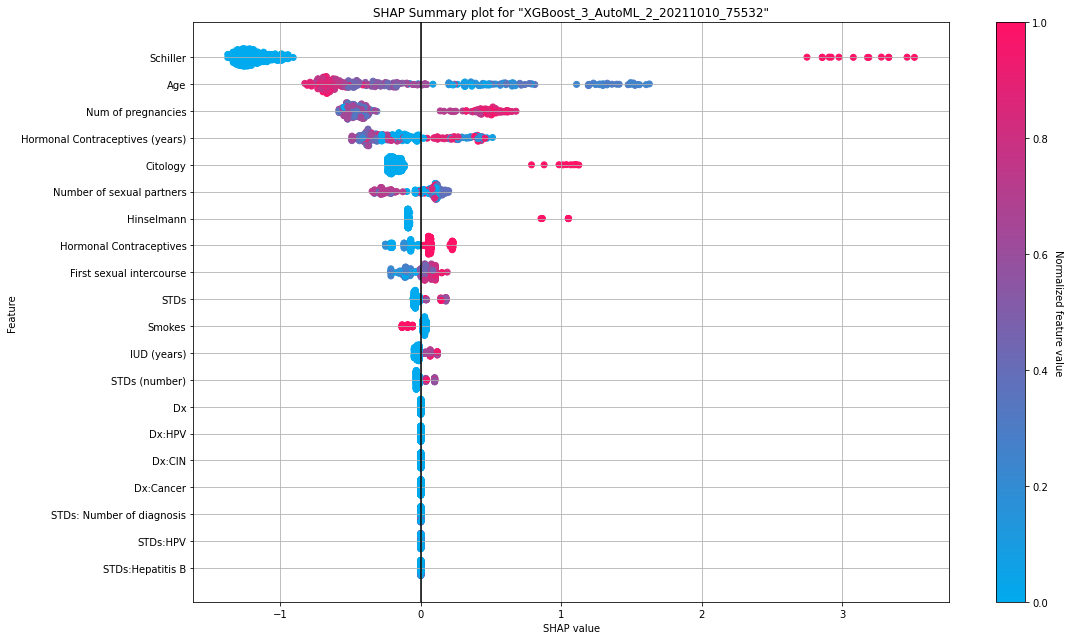

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

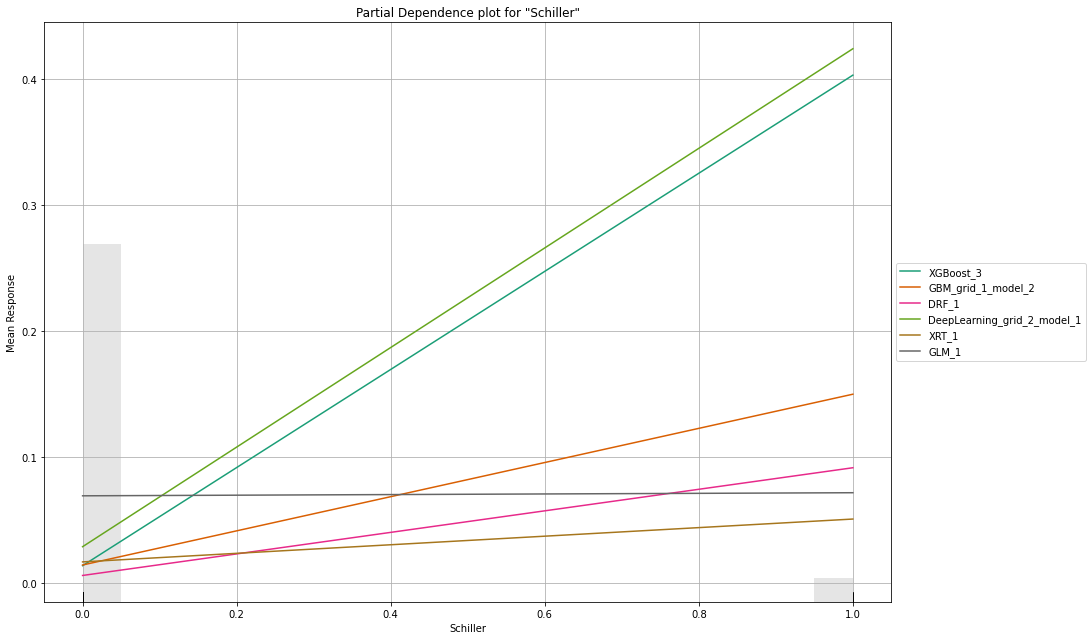

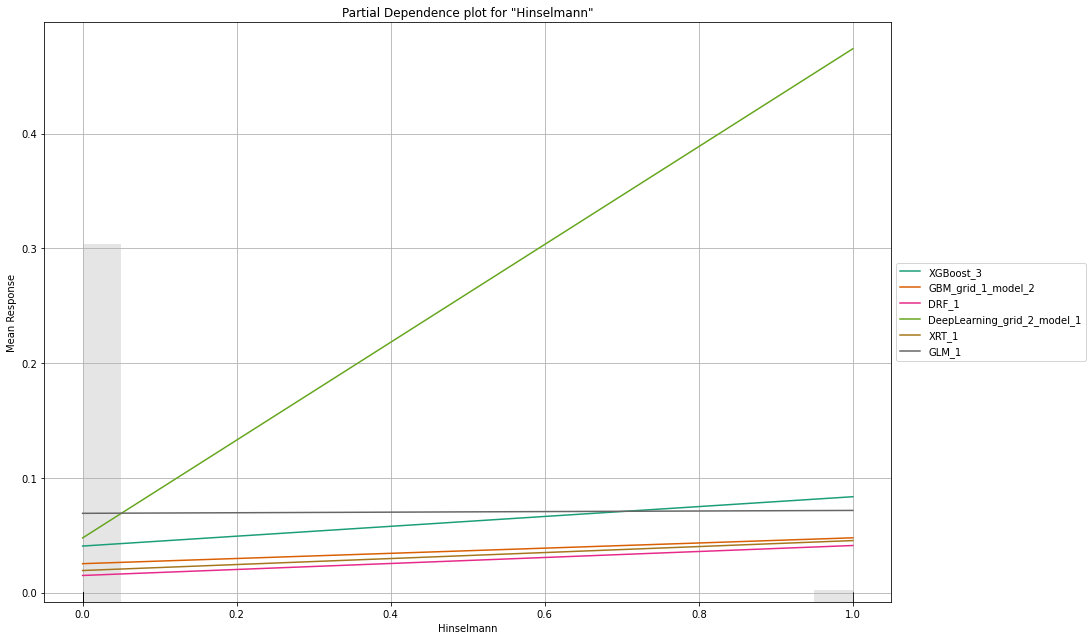

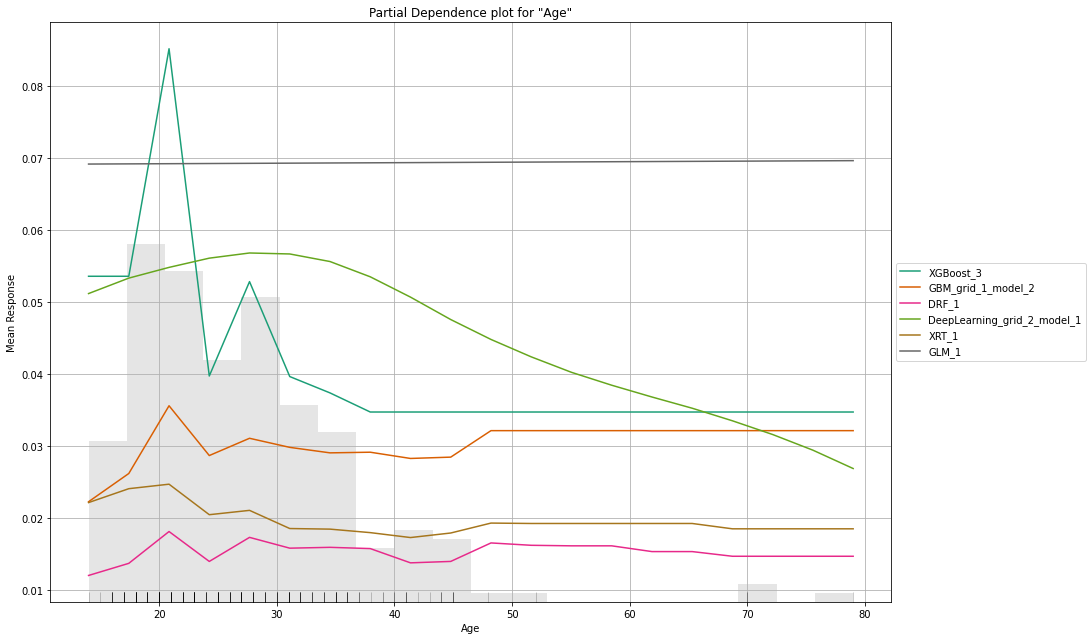

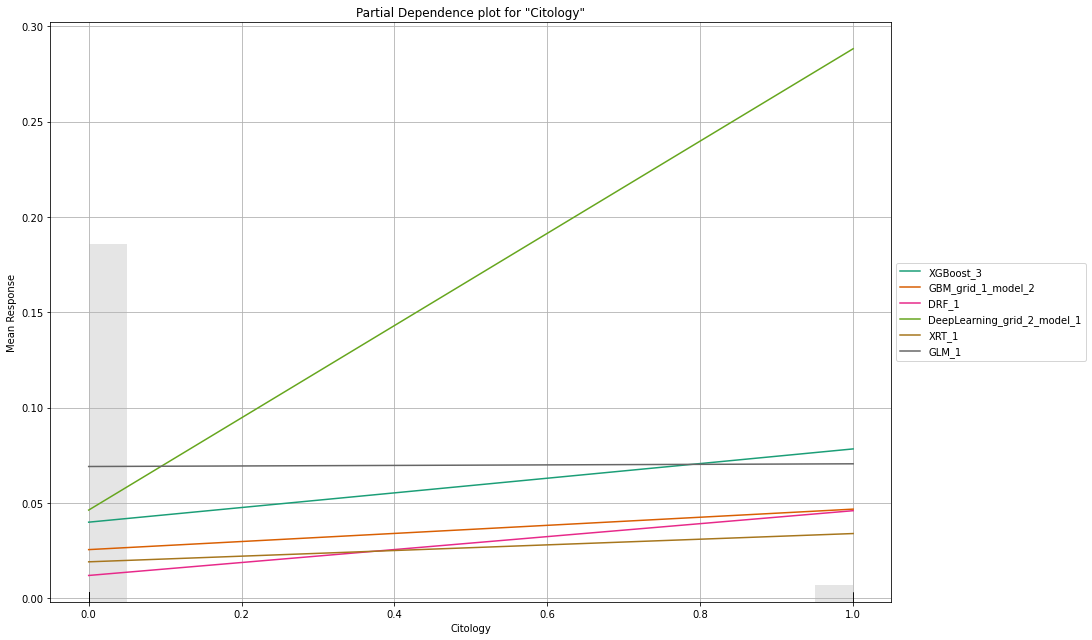

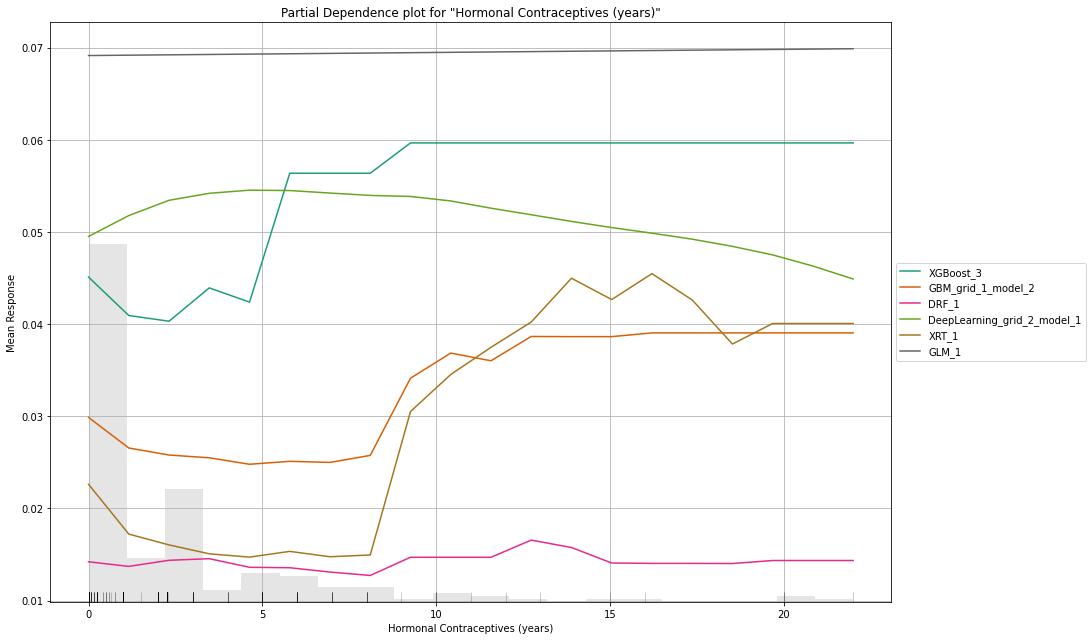

In [51]:
#compare all models
exm = aml.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_3_AutoML_2_20211010_75532


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27013739943504333: 


0     1   Error          Rate
0      0  209.0   3.0  0.0142   (3.0/212.0)
1      1    1.0  10.0  0.0909    (1.0/11.0)
2  Total  210.0  13.0  0.0179   (4.0/223.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

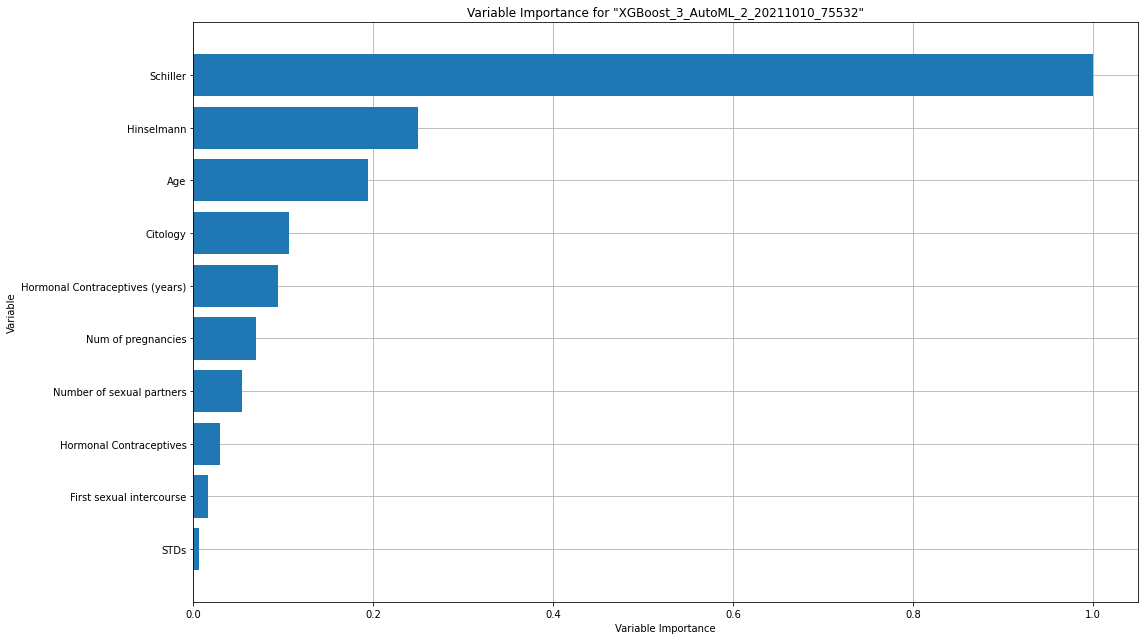

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

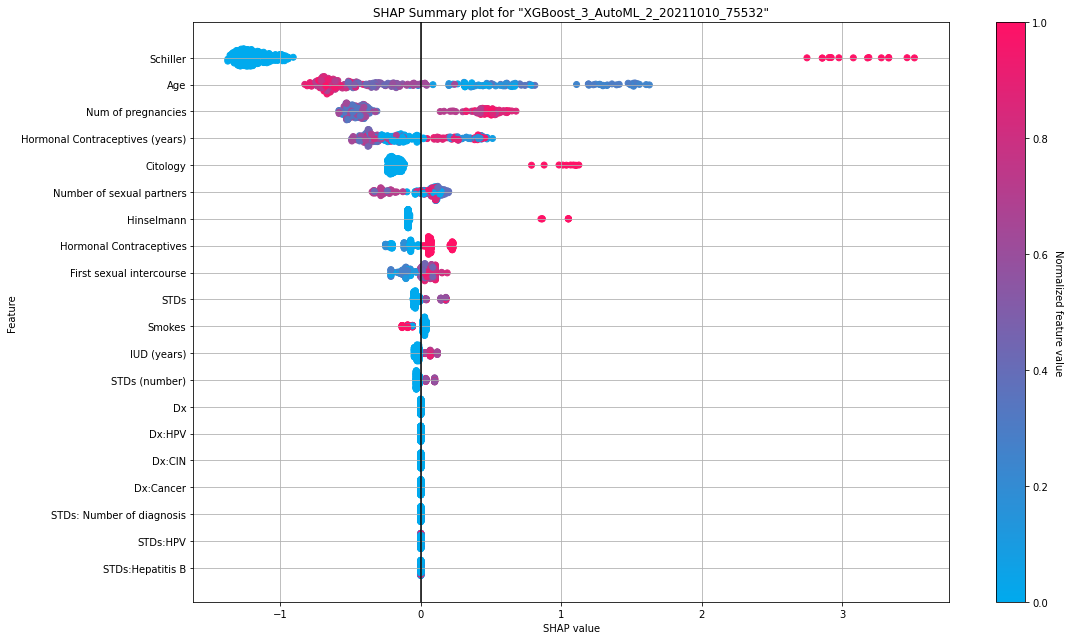

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

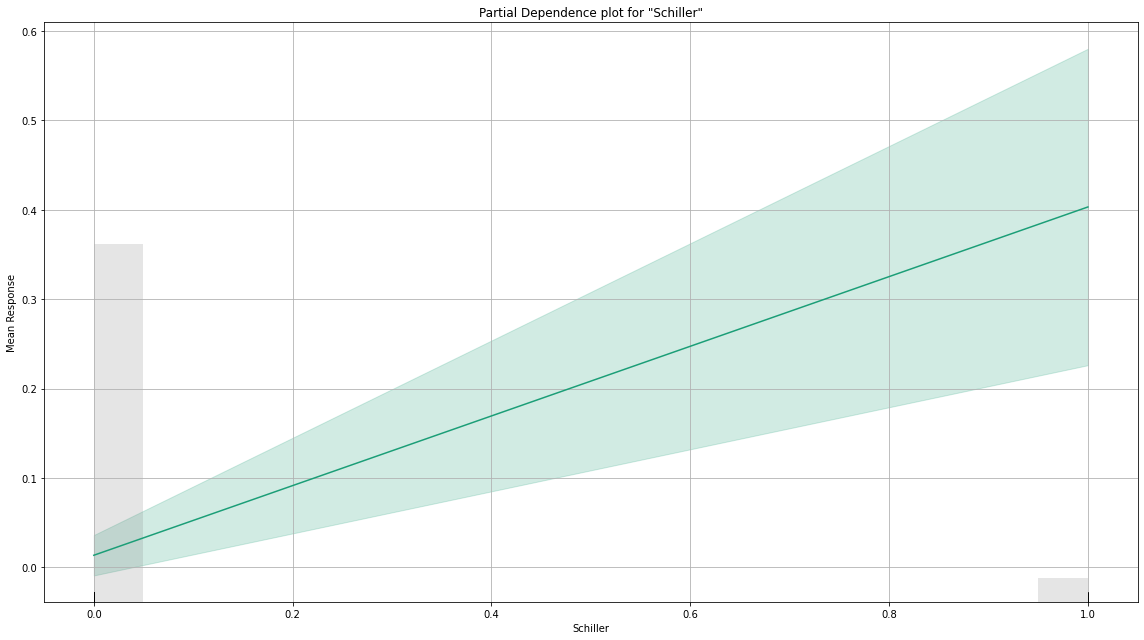

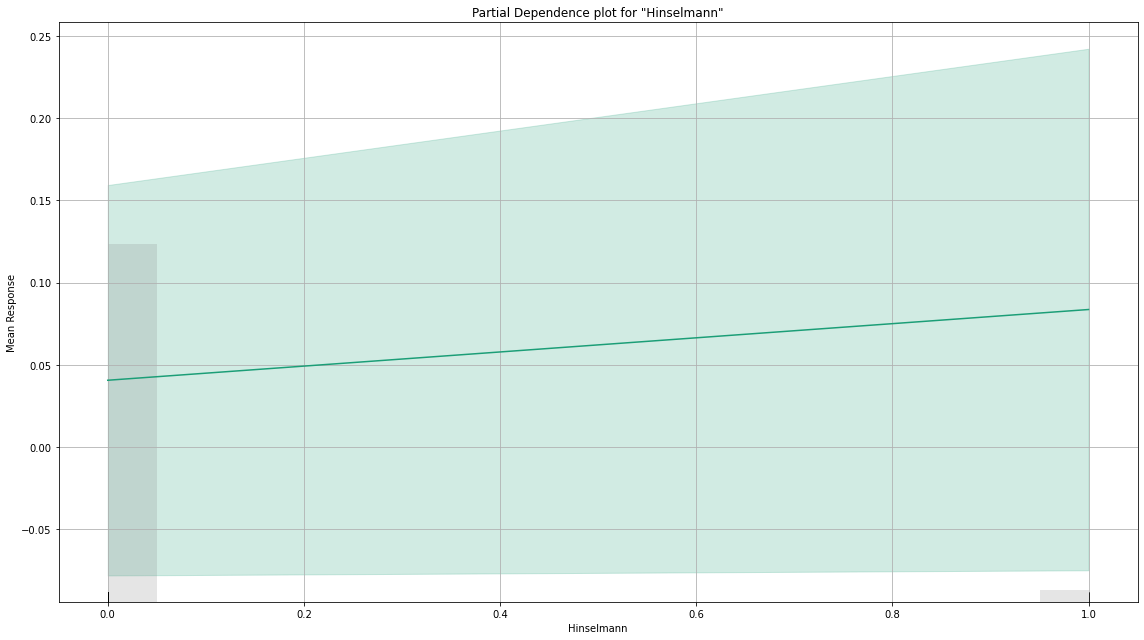

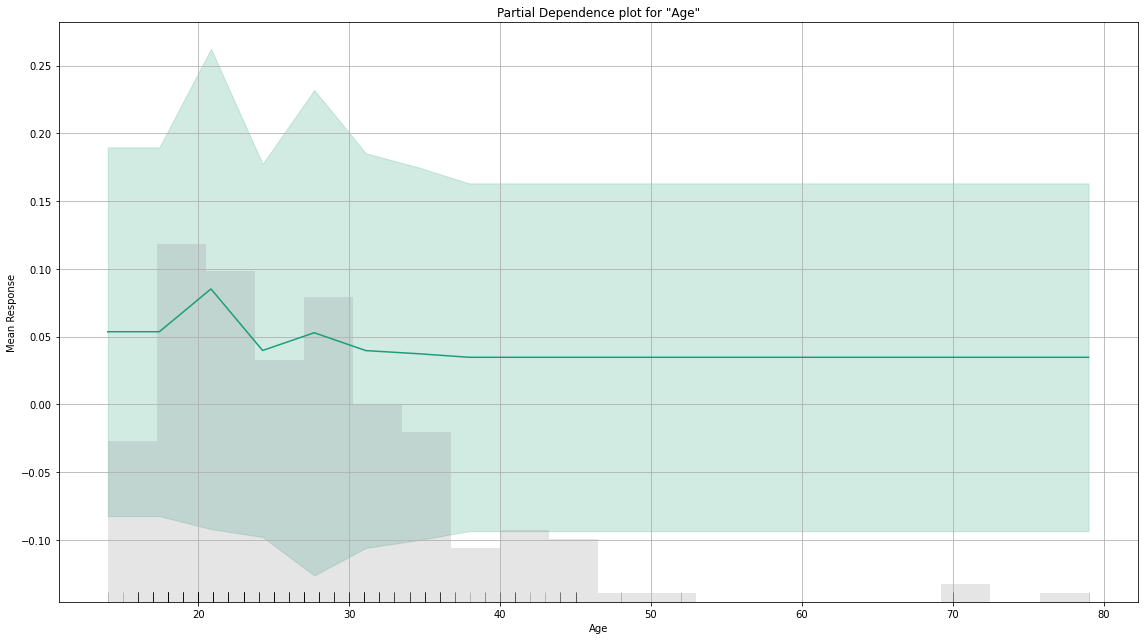

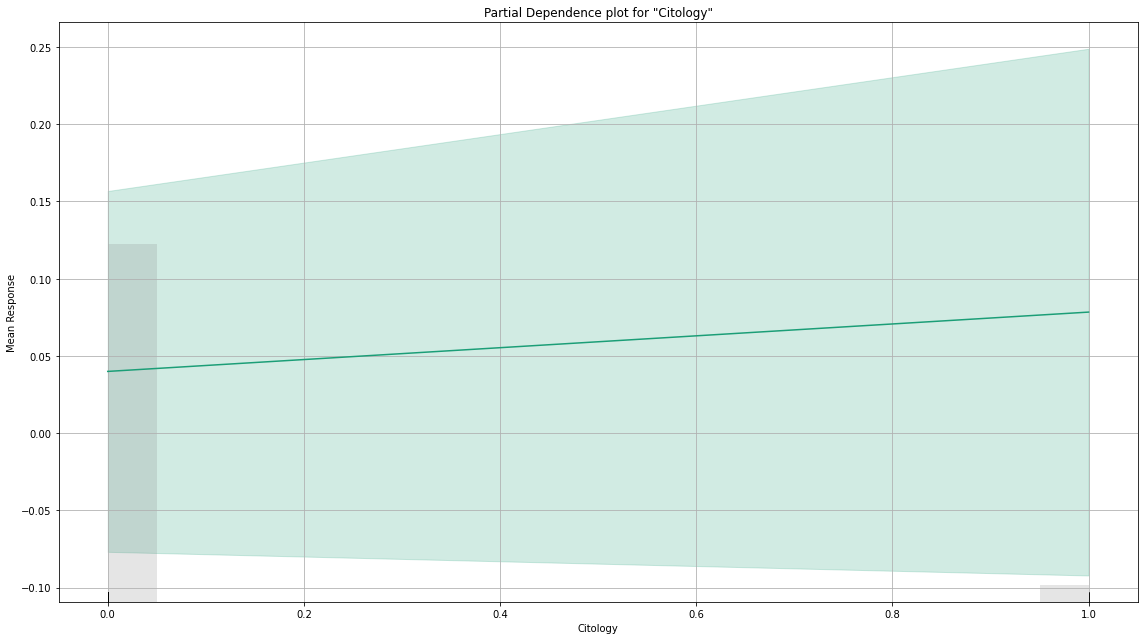

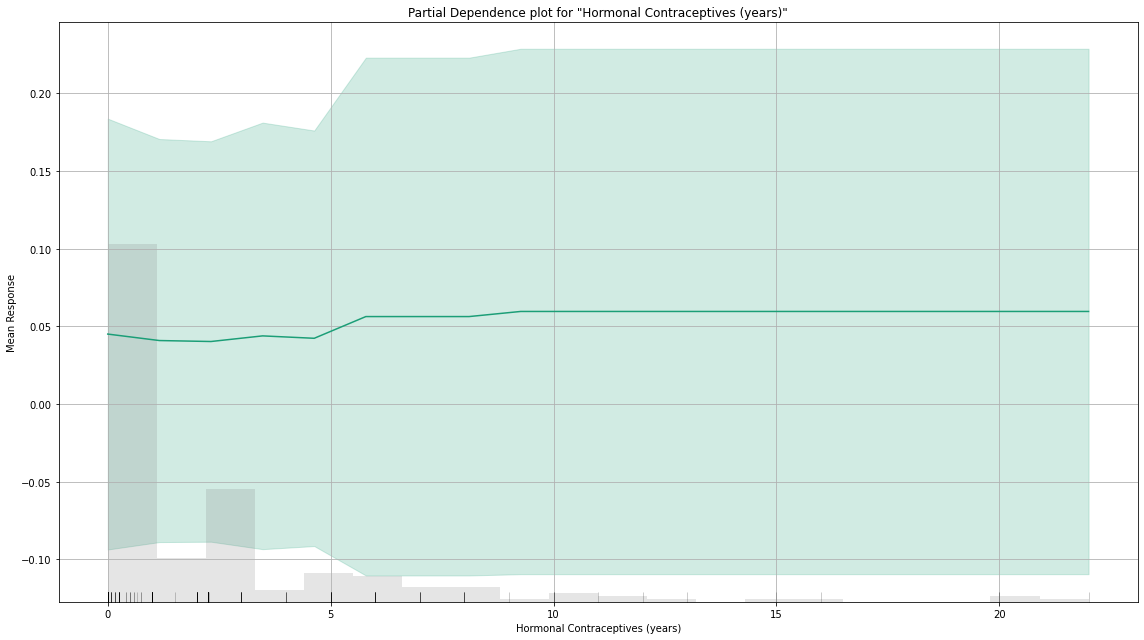

In [52]:
#explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

In [53]:
#make prediction
preds = aml.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [54]:
#combine the prediction with the test dataset
df = test.cbind(preds)

#preview
df.head(10)

Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy predict p0 p1 
 
 
 15 1 14 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.995856 0.00414396 
 42 3 23 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.998078 0.00192198 
 44 3 26 4 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.996569 0.00343113 
 27 1 17 3 0 0 0 1 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.983922 0.0160783 
 45 4 14 6 0 0 0 1 10 1 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.988463 0.0115368 
 41 4 21 3 0 0 0 1 0.25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.989516 0.010484 
 37 6 26 1 0 0 0 1 0.25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.995822 0.00417756 
 41 3 17 3 0 0 0 1 22 1 0.58 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.992283 0.00771727 
 36 2 20 3 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.994851 0.00514919 
 37 2 18 2.27556 0 0 0 0 0 0.112011 0.514804 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0.472093 0.527907

In [55]:
df = h2o.as_list(df)

In [56]:
preds = df[['Biopsy', 'predict']].head(20)
preds

Biopsy  predict
0        0        0
1        0        0
2        0        0
3        0        0
4        0        0
5        0        0
6        0        0
7        0        0
8        0        0
9        1        1
10       0        0
11       0        0
12       0        0
13       0        0
14       0        0
15       0        0
16       0        0
17       0        0
18       0        0
19       0        0

# Use LIME to explain H2O Models

In [57]:
!pip install lime
import lime
import lime.lime_tabular

In [58]:
feature_names = train.columns[0: -1]
feature_names

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology']

In [59]:
train_features_numpy = train[feature_names].as_data_frame().values
train_features_numpy

array([[18.        ,  4.        , 15.        , ...,  0.        ,
         0.        ,  0.        ],
       [34.        ,  1.        , 16.99529965, ...,  0.        ,
         0.        ,  0.        ],
       [52.        ,  5.        , 16.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [25.        ,  2.        , 17.        , ...,  0.        ,
         0.        ,  1.        ],
       [33.        ,  2.        , 24.        , ...,  0.        ,
         0.        ,  0.        ],
       [29.        ,  2.        , 20.        , ...,  0.        ,
         0.        ,  0.        ]])

In [60]:
#define LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(train_features_numpy, 
                                                   feature_names = feature_names,
                                                   mode='classification')

In [61]:
#https://sefiks.com/2019/09/19/explaining-h2o-models-with-lime/

def findPrediction(instance):

 #instance will be in type of numpy
 df = pd.DataFrame(data = instance, columns = feature_names)
 hf = h2o.H2OFrame(df)
 predictions = aml.leader.predict(hf).as_data_frame()
 
 #here predictions object is 3 columned data frame. 1st column is class prediction and others are probabilities
 #lime needs just prediction probabilities
 
 predictions = predictions.iloc[:,1:].values
 return predictions

In [62]:
idx = 100
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

In [63]:
test_numpy

array([45.,  2., 18.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.])

In [64]:
exp = explainer.explain_instance(test_numpy, 
                                 findPrediction, 
                                 num_features = len(feature_names))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [65]:
exp.show_in_notebook(show_table=True, show_all=True)

In [66]:
idx = 120
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

exp = explainer.explain_instance(test_numpy, 
                                 findPrediction, 
                                 num_features = len(feature_names))

exp.show_in_notebook(show_table=True, show_all=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [73]:
idx = 150
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

exp = explainer.explain_instance(test_numpy, 
                                 findPrediction, 
                                 num_features = len(feature_names))

exp.show_in_notebook(show_table=True, show_all=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
